## 数据应用学院 Data Scientist Program
## Hw1

In [1]:
# import the necessary package at the very beginning
import numpy as np
import pandas as pd

In [2]:
print(str(float(100*177/891)) + '%')

19.865319865319865%


#### 1. Please rewrite following functions to lambda expressions

Example:

```
def AddOne(x):
    y=x+1
    return y
    
addOneLambda = lambda x: x+1
```

In [3]:
def foolOne(x): # note: assume x is a number
    y = x * 2
    y -= 25
    return y

In [4]:
## Type Your Answer Below ##
foolOne_lambda = lambda x: x*2-25

In [5]:
# Generate a random 3*4 matrix for test
tlist = np.random.randn(3,4) 
tlist

array([[ 0.59605721, -0.58168464,  1.10235931, -0.22210643],
       [ 0.0510592 ,  0.27080598,  0.31279761, -0.38567646],
       [ 0.20848164,  0.74616363, -1.35820611, -2.05312776]])

In [6]:
# Check if the lambda function yields same results as previous function
def test_foolOne(tlist, func1, func2):
    if func1(tlist).all() == func2(tlist).all():
        print("Same results!")
        
test_foolOne(tlist, foolOne, foolOne_lambda)

Same results!


In [15]:
def foolTwo(x): # note: assume x here is a string
    if x.startswith('g'):
        return True
    else:
        return False

In [16]:
## Type Your Answer Below ##
foolTwo_lambda = lambda x: x.startswith('g')

In [34]:
# Generate a random 3*4 matrix of strings for test
# reference: https://pythontips.com/2013/07/28/generating-a-random-string/
# reference: http://www.programcreek.com/python/example/1246/string.ascii_lowercase

import random
import string 

def random_string(size):
    new_string = ''.join([random.choice(string.ascii_letters + string.digits) for n in range(size)])
    return new_string

def test_foolTwo():
    test_string = random_string(6)
    if foolTwo_lambda(test_string) == foolTwo(test_string):
        return True
        
for i in range(10):
    if test_foolTwo() is False:
        print('Different results!')

#### 2. What's the difference between tuple and list?

In [59]:
## Type Your Answer Below ##
# reference: https://docs.python.org/3/tutorial/datastructures.html
# tuple is immutable. They cannot be changed once they are made.
# tuples are easier for the python interpreter to deal with and therefore might end up being easier
# tuples might indicate that each entry has a distinct meaning and their order has some meaning (e.g., year)
# Another pragmatic reason to use tuple is when you have data which you know should not be changed (e.g., constant)
# tuples can be used as keys in dictionaries
# tuples usually contain a heterogeneous sequence of elements that are accessed via unpacking or indexing (or even by attribute in the case of namedtuples).
tuple1 = (1, 2, 3, 'a', True)
print('tuple: ', tuple1)
print('1st item of tuple: ', tuple1[0])
tuple1[0] = 4 # item assignment won't work for tuple

tuple:  (1, 2, 3, 'a', True)
1st item of tuple:  1


TypeError: 'tuple' object does not support item assignment

In [70]:
# tuple with just one element
tuple2 = (1) # just a number, so has no elements
print(type(tuple2))
tuple2[0]

<class 'int'>


TypeError: 'int' object is not subscriptable

In [71]:
# tuple with just one element
tuple3 = (1, ) 
print(type(tuple3))
tuple3[0]

<class 'tuple'>


1

In [82]:
# Question for TA: is tuple comprehension supported?
tuple4 = (char for char in 'abcdabcdabcd' if char not in 'ac')
print(tuple4)

<generator object <genexpr> at 0x0000014582DF11A8>


In [90]:
# Question for TA: is the following two tuples the same?
tuple4= (1,2,'a'),(True, False)
tuple5 = ((1,2,'a'),(True, False))
print(tuple4)
print(tuple5)

((1, 2, 'a'), (True, False))
((1, 2, 'a'), (True, False))


In [65]:
# lists' elements are usually homogeneous and are accessed by iterating over the list.
list1 = [1, 2, 3, 'a', True] 
print('list1: ', list1)
print('1st item of list: ', list1[0])
list1[0] = 4 # item assignment works for list

# list comprehensions
list_int = [element for element in list1 if type(element)==int]
print("list_int", list2)

list1:  [1, 2, 3, 'a', True]
1st item of list:  1
list_int [4, 2, 3]


In [77]:
## Type Your Answer Below ##
# A set is an unordered collection with no duplicate elements. 

# set() can be used to eliminate duplicate entries
list1 = ['apple', 'orange', 'apple', 'pear', 'orange', 'banana']
set1 = set(list1)
print(set1)

# set can be used for membership testing
set2 = {1, 2, 'abc', True}
print('abc' in set2) # membership testing
set1[0] # set does not support indexing

{'banana', 'orange', 'pear', 'apple'}
True


TypeError: 'set' object does not support indexing

In [79]:
# set comprehensions
set4 = {char for char in 'abcdabcdabcd' if char not in 'ac'}
print(set4)

{'b', 'd'}


#### 3. Why set is faster than list in python? 
#### Answers:
Set and list are implemented using two different data structures - Hash tables and Dynamic arrays.
. Python lists are implemented as dynamic arrays (which can preserve ), which must be searched one by one to compare every single member for equality, with lookup speed O(n) depending on the size of the list.
. Python sets are implemented as hash tables, which can directly jump and locate the bucket (the position determined by the object's hash) using hash in a constant speed O(1), regardless of the size of the set.

In [99]:
# Calculate the time cost differences between set and list
import time
import random    

def compute_search_speed_difference(scope):    
    list1 = []
    dic1 = {}
    set1 = set(dic1)
    for i in range(0,scope):
        list1.append(i)
        set1.add(i)
        
    random_n = random.randint(0,100000) # look for this random integer in both list and set

    list_search_starttime = time.time()
    list_search = random_n in list1
    list_search_endtime = time.time()
    list_search_time = list_search_endtime - list_search_starttime # Calculate the look-up time in list
    #print("The look up time for the list is:")
    #print(list_search_time)

    set_search_starttime = time.time()
    set_search = random_n in set1
    set_search_endtime = time.time()
    set_search_time = set_search_endtime - set_search_starttime # Calculate the look-up time in set
    #print("The look up time for the set is:")
    #print(set_search_time)
    
    speed_difference = list_search_time - set_search_time
    return(speed_difference)

def test(testing_times, scope):
    test_speed_difference = []
    for i in range(0,testing_times):
        test_speed_difference.append(compute_search_speed_difference(scope))
    return(test_speed_difference)

#print(test(1000, 100000)) # test 10 times can print out the time cost differences
print("On average, the look up time for a list is more than a set in:")
print(np.mean(test(100, 1000)))                   

On average, the look up time for a list is more than a set in:
6.02245330811e-05


#### 4. What's the major difference between array in numpy and series in pandas?
Pandas series (which can contain values of different data types) is much more general and flexible than the one-dimensional Numpy array(which can only contain one data type).

While Numpy array has an implicitly defined integer used to access the values, the Pandas series has an explicitly defined index (which can be any data type) associated with the values (which gives the series object additonal capabilities).

### What's the relationships among Numpy, Pandas and SciPy:
. Numpy is a libary for efficient array computations, modeled after Matlab. Arrays differ from plain Python lists in the way they are stored and handled. Array elements stay together in memory, so they can be quickly accessed. Numpy also supports quick subindexing (a[0,:,2]). Furthermore, Numpy provides vectorized mathematical functions (when you call numpy.sin(a), the sine function is applied on every element of array a), which are faster than a Python for loop.

. Pandas library is good for analyzing tabular data for exploratory data analysis, statistics and visualization. It's used to understand the data you have.

. Scipy provides large menu of libraries for scientific computation, such as integration, interpolation, signal processing, linear algebra, statistics. It's built upon the infrastructure of Numpy. It's good for performing scientific and engineering calculation.

. Scikit-learn is a collection of advanced machine-learning algorithms for Python. It is built upon Numpy and SciPy. It's good to use the data you have to train a machine-learning algorithm. 


In [100]:
## Type Your Answer Below ##
student = np.array([0, 'Alex', 3, 'M'])
print(student) # all the values' datatype is converted to str

['0' 'Alex' '3' 'M']


#### Question 5-11 are related to titanic data (train.csv) on kaggle website
You can download the data from the following link:<br />https://www.kaggle.com/c/titanic/data

#### 5. Read titanic data (train.csv) into pandas dataframe, and display a sample of data.

In [123]:
## Type Your Answer Below ##
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/pcsanwald/kaggle-titanic/master/train.csv')
df.sample(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
717,1,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S
705,0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S


In [124]:
df.tail(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [112]:
df.describe()

C:\Users\fengh\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


#### 6. What's the percentage of null value in 'Age'?

In [135]:
## Type Your Answer Below ##
len(df[df.age.isnull()])/len(df)*100


19.865319865319865

#### 7. How many unique classes in 'Embarked' ?

In [136]:
## Type Your Answer Below ##
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [147]:
print('number of classes: ', len(df.embarked.value_counts().index))
print('names of classes: ', df.embarked.value_counts().index)

number of classes:  3
names of classes:  Index(['S', 'C', 'Q'], dtype='object')


In [151]:
# Another method
embarked_set = set(df.embarked)
print(df.embarked.unique())

['S' 'C' 'Q' nan]


#### 8. Compare survival chance between male and female passangers. 
Please use pandas to plot a chart you think can address this question

In [164]:
## Type Your Answer Below ##
male_survived = df[df.survived==1][df.sex=='male']
male_survived_n = len(df.query('''sex=='male' and survived ==1'''))

C:\Users\fengh\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [166]:
female_survived = df[df.survived==1][df.sex=='female']
female_survived_n = len(df.query('''sex=='female' and survived ==1'''))

C:\Users\fengh\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [198]:
df_survived = pd.DataFrame({'male':male_survived_n, 'female': female_survived_n}, index=['Survived_number'])
df_survived

,female,male
Survived_number,233,109


In [199]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

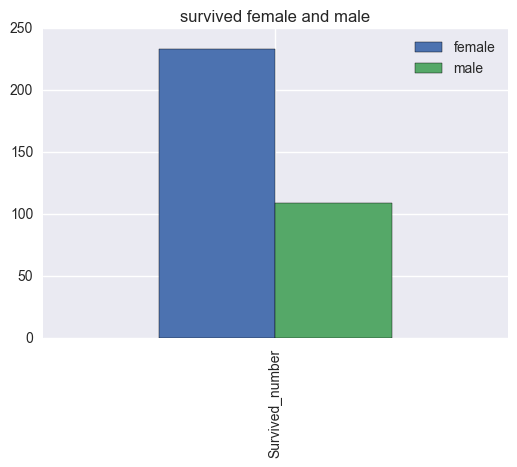

In [208]:
df_survived.plot(kind='bar', title='survived female and male', legend='True')

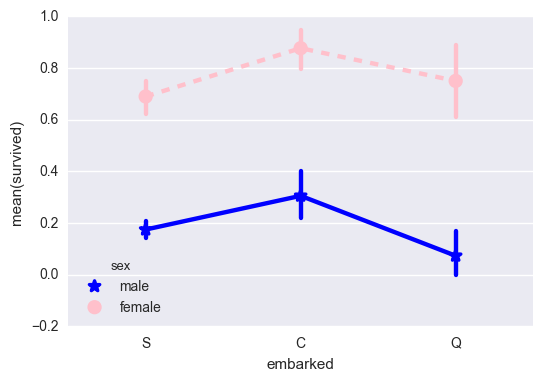

In [212]:
sns.pointplot(x='embarked', y='survived', hue='sex', data=df, palette={'male':'blue', 'female':'pink'}, markers=["*", "o"], linestyles=['-', '--'])

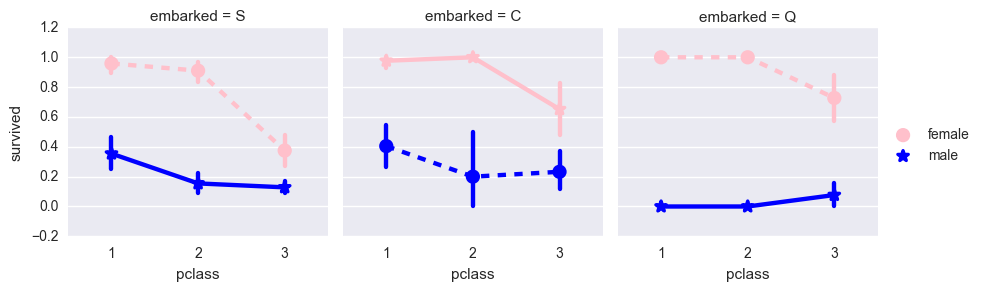

In [215]:
grid = sns.FacetGrid(df, col='embarked')
grid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette={'male':'blue', 'female':'pink'}, markers=["*", "o"], linestyles=['-', '--'])
grid.add_legend()

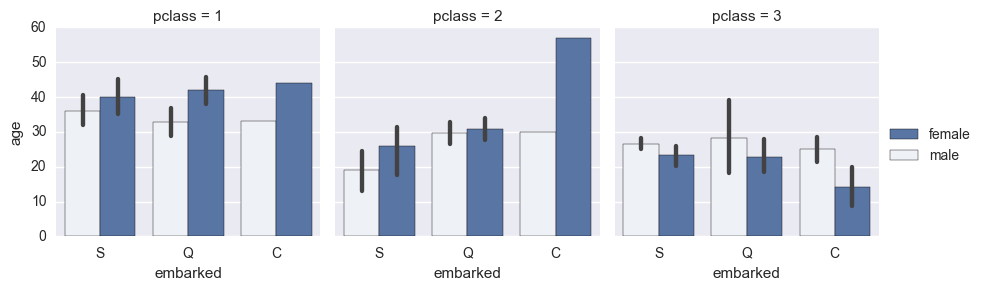

In [217]:
grid = sns.FacetGrid(data_train, col='pclass')
grid.map(sns.barplot, 'embarked', 'age', 'sex')
grid.add_legend()

#### Observations from barplot above:
1. In Pclass = 1 and 2, female has higher mean age than male. But in Pclass = 3, female has lower mean age than male.
2. Passengers in Pclass = 1 has the highest average age, followed by Pclass = 2 and Pclass = 3.
3. Age trend among Embarked is not abvious

#### Decisions:
Use 'Pclass'and 'Sex' in estimating missing values in 'Age'.

#### 9. Show the table of passangers who are 23 years old.

In [218]:
## Type Your Answer Below ##
df_23=df.query('''age>23''')
df_23

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
18,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


#### 10. Is there a Jack or Rose in our dataset?

In [275]:
# first split name into string lists by ' '
def format_name(df):
    df['split_name'] = df.name.apply(lambda x: x.split(' '))
    return df    

print(df.sample(3).split_name, '\n')

# for each subset string of name, check if "jack" or "rose" in it
for i in format_name(df).split_name:
        for l in i:
            if (("jack" in l.lower()) | ("rose" in l.lower()) ):
                print("found names that contain jack or rose: ", l)

255      [Touma,, Mrs., Darwis, (Hanne, Youssef, Razi)]
805                      [Johansson,, Mr., Karl, Johan]
343    [Sedgwick,, Mr., Charles, Frederick, Waddington]
Name: split_name, dtype: object 

found names that contain jack or rose:  Ambrose
found names that contain jack or rose:  Jackson
found names that contain jack or rose:  Rosen)


#### 11. What's the percentage of surviving when passangers' pclass is 1?

In [243]:
## Type Your Answer Below ##
df4 = df.query('''pclass==1''')

def percent(x):
    m = int(x.count())
    n = m/len(df4)
    return(n)

df[['survived','pclass']].query('''pclass==1''').groupby([ 'survived']).agg({'pclass':percent})

,pclass
survived,
0,0.37037
1,0.62963


### Refereences
https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
https://docs.python.org/3/tutorial/datastructures.html
https://stackoverflow.com/questions/2030053/random-strings-in-python
